In [2]:
# --- 1. DATA SCIENCE STACK ---
import numpy as np
import pandas as pd

# --- 2. VISUALIZATION STACK ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- 3. CONFIGURATION (The "Expert" Touch) ---
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.1)

# Ensure plots render inside the notebook
%matplotlib inline

# Suppress annoying warnings (keep output clean)
import warnings
warnings.filterwarnings('ignore')

print("✅ Environment Setup Complete.")
# --- UNCOMMENT THE LINE FOR YOUR CHOSEN TRACK ---

#OPTION A: Titanic (Survival Analysis)
df = sns.load_dataset('titanic')
print("Titanic Dataset Loaded.")
print(df)



✅ Environment Setup Complete.
Titanic Dataset Loaded.
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third  

In [3]:
# --- 1. INSPECT THE DAMAGE ---
print("--- Missing Values BEFORE Cleaning ---")
print(df.isnull().sum())
print("-" * 30)

# --- 2. EXECUTE CLEANING STRATEGY ---

# A. Handle 'age': Fill missing values with the Median age (Safe approach)
# Note: Mean is affected by outliers, Median is safer for age.
df['age'] = df['age'].fillna(df['age'].median())

# B. Handle 'deck': Too many missing values (>75%), so we drop the column
# We check if it exists first to avoid errors if you run this cell twice
if 'deck' in df.columns:
    df.drop('deck', axis=1, inplace=True)

# C. Handle 'embarked': Only 2 rows missing, so we just drop those rows
df.dropna(subset=['embarked'], inplace=True)

# --- 3. VERIFY CLEANLINESS ---
print("--- Missing Values AFTER Cleaning ---")
print(df.isnull().sum())
print(f"\n✅ Data Cleaned. Final Shape: {df.shape}")

--- Missing Values BEFORE Cleaning ---
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
------------------------------
--- Missing Values AFTER Cleaning ---
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

✅ Data Cleaned. Final Shape: (889, 14)


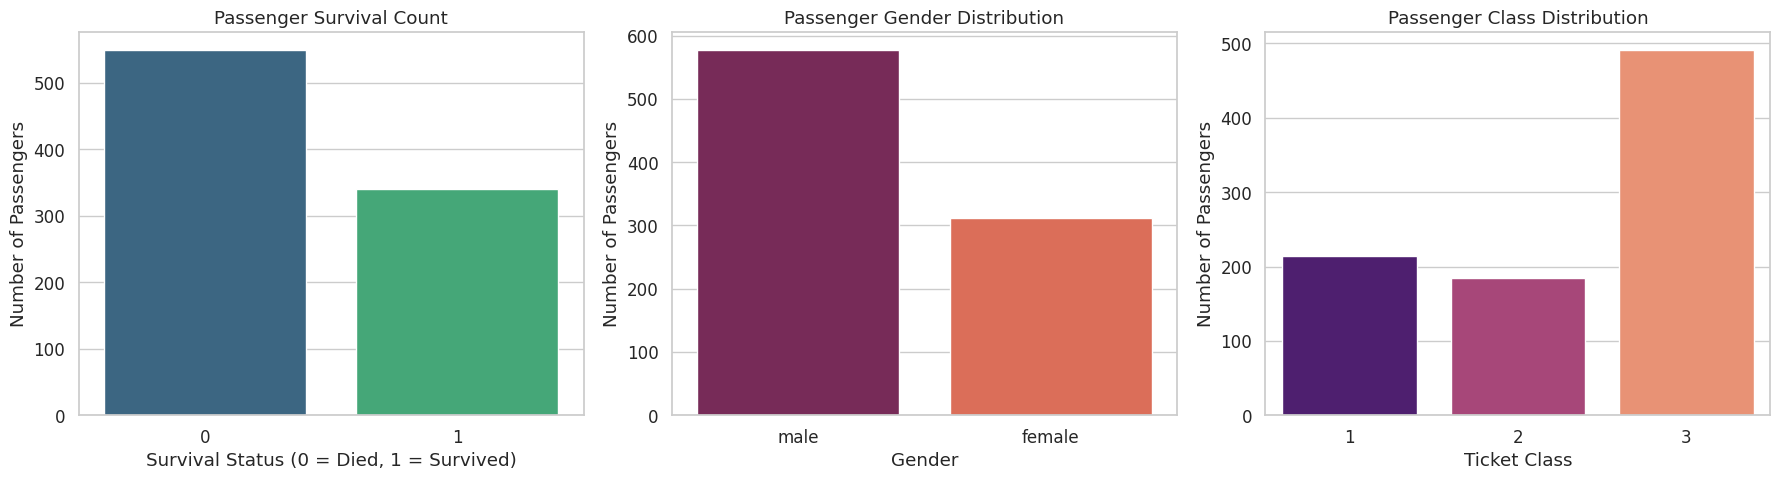

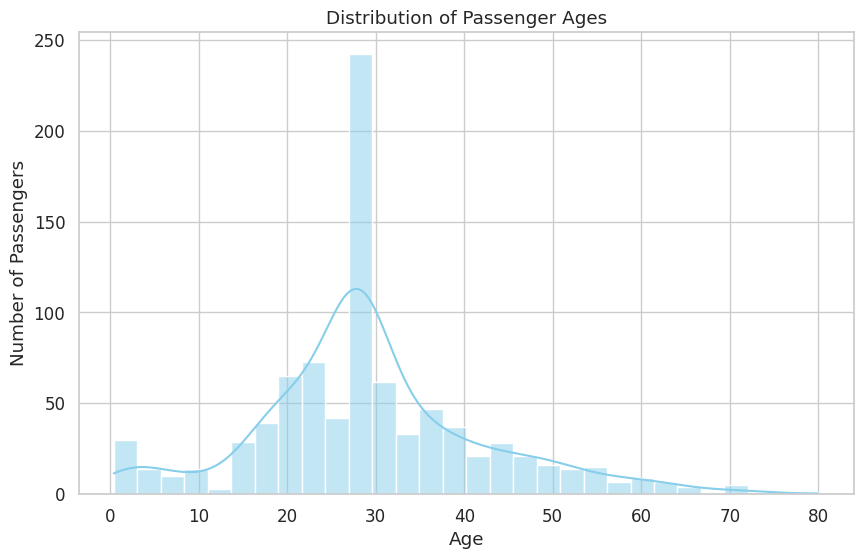

In [4]:
# Set up a grid of plots (1 row, 3 columns) for categorical data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Survival Count (0 = Died, 1 = Survived)
# This plot shows the distribution of the target variable 'survived'.
sns.countplot(x='survived', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Passenger Survival Count')
axes[0].set_xlabel('Survival Status (0 = Died, 1 = Survived)')
axes[0].set_ylabel('Number of Passengers')

# Plot 2: Gender Split
# This plot visualizes the distribution of male and female passengers.
sns.countplot(x='sex', data=df, ax=axes[1], palette='rocket')
axes[1].set_title('Passenger Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Number of Passengers')

# Plot 3: Ticket Class Distribution
# This plot shows how many passengers were in each ticket class (1st, 2nd, 3rd).
sns.countplot(x='pclass', data=df, ax=axes[2], palette='magma')
axes[2].set_title('Passenger Class Distribution')
axes[2].set_xlabel('Ticket Class')
axes[2].set_ylabel('Number of Passengers')

plt.tight_layout()
plt.show()

# Plot 4: Age Distribution (Numerical Data requires a Histogram)
# This histogram visualizes the age distribution of all passengers, with a Kernel Density Estimate (KDE).
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

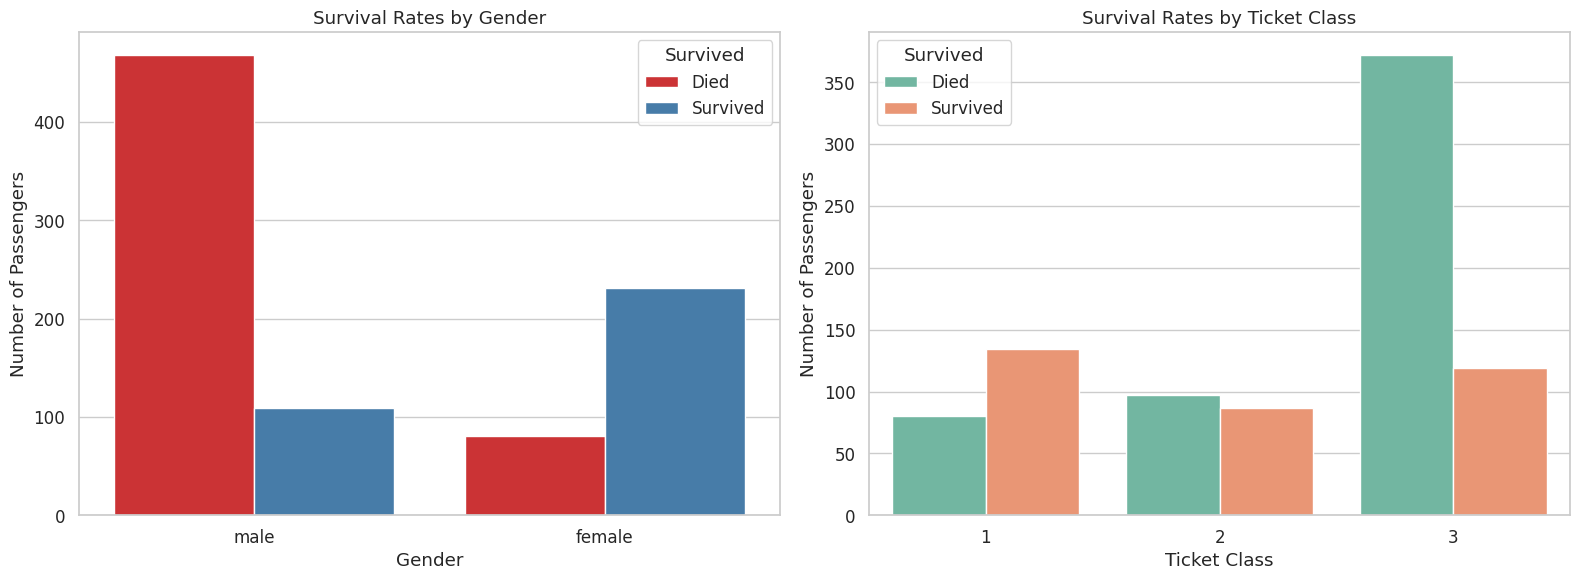

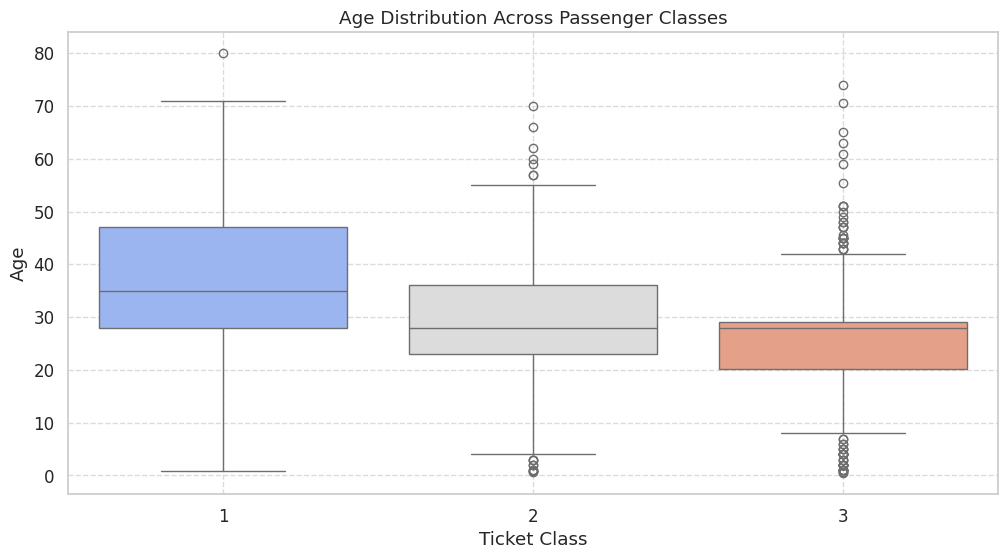

In [5]:
# Create a grid for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Survival by Gender ---
# This countplot compares the survival counts between male and female passengers.
# 'hue=\'survived\'' separates the bars by survival status.
sns.countplot(x='sex', hue='survived', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Survival Rates by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Passengers')
axes[0].legend(title='Survived', labels=['Died', 'Survived'])

# --- Plot 2: Survival by Class ---
# This countplot compares the survival counts across different ticket classes.
# 'hue=\'survived\'' separates the bars by survival status.
sns.countplot(x='pclass', hue='survived', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Survival Rates by Ticket Class')
axes[1].set_xlabel('Ticket Class')
axes[1].set_ylabel('Number of Passengers')
axes[1].legend(title='Survived', labels=['Died', 'Survived'])

plt.tight_layout()
plt.show()

# --- Plot 3: Age vs Class (Wealth Distribution) ---
# This boxplot shows the distribution of ages for each passenger class, indicating wealth distribution.
# It helps to visualize median age, interquartile range, and outliers for each class.
plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='age', data=df, palette='coolwarm')
plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Ticket Class')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

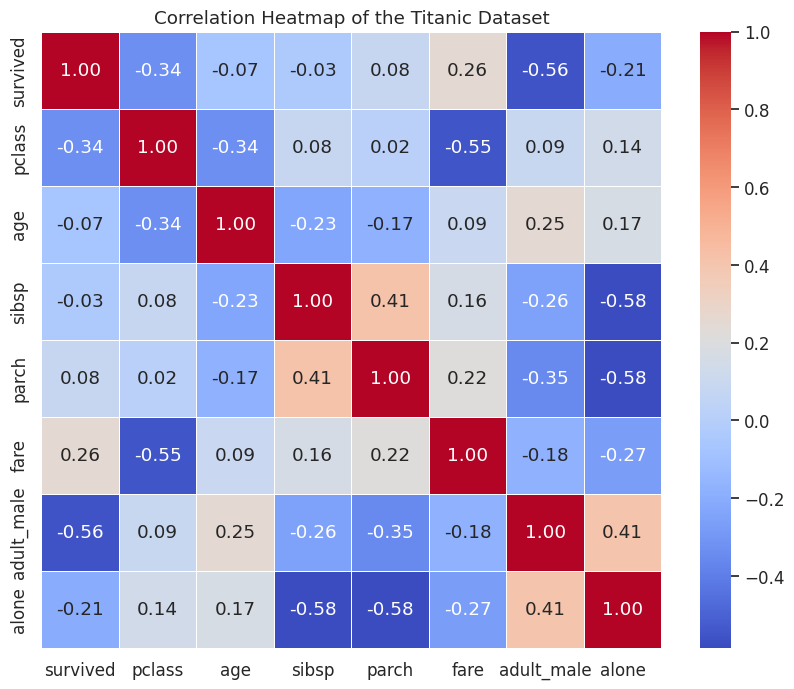

In [6]:
# --- 1. CORRELATION MATRIX ---
# We calculate correlation only on numeric columns to avoid errors
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
# annot=True writes the numbers in the boxes
# cmap='coolwarm' makes positive red and negative blue
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of the Titanic Dataset')
plt.show()